In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl

!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv -o "newdata.csv"

df = pd.read_csv("newdata.csv")
df.head()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 72629  100 72629    0     0  72598      0  0:00:01  0:00:01 --:--:-- 72847


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [2]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
cdf = df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
cdf.head(9)

,CYLINDERS,ENGINESIZE,CO2EMISSIONS,FUELCONSUMPTION_COMB
0,4,2.0,196,8.5
1,4,2.4,221,9.6
2,4,1.5,136,5.9
3,6,3.5,255,11.1
4,6,3.5,244,10.6
5,6,3.5,230,10.0
6,6,3.5,232,10.1
7,6,3.7,255,11.1
8,6,3.7,267,11.6


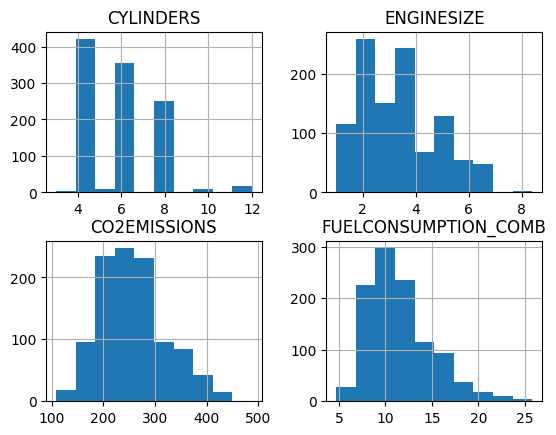

In [5]:
vis = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
vis.hist()
plt.show()

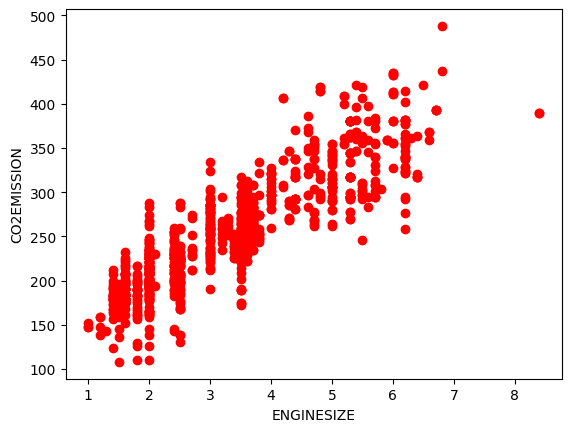

In [6]:
plt.scatter(cdf['ENGINESIZE'], cdf['CO2EMISSIONS'], color='red')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSION')
plt.show()

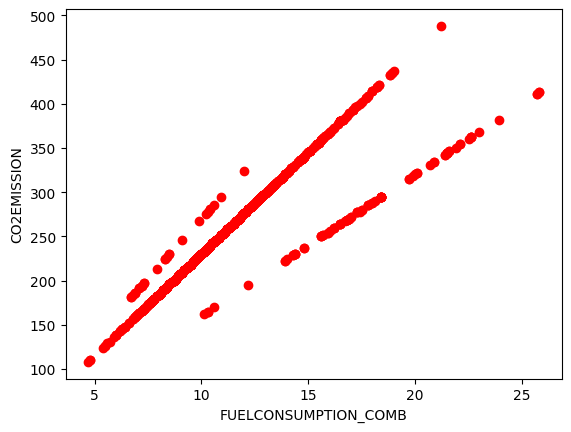

In [8]:
plt.scatter(cdf['FUELCONSUMPTION_COMB'], cdf['CO2EMISSIONS'], color='red')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSION')
plt.show()

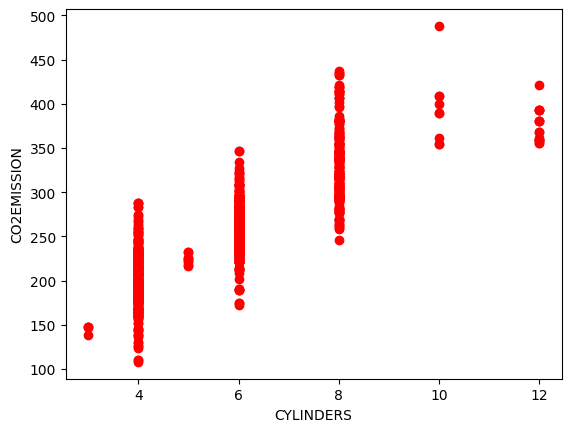

In [9]:
plt.scatter(cdf['CYLINDERS'], cdf['CO2EMISSIONS'], color='red')
plt.xlabel('CYLINDERS')
plt.ylabel('CO2EMISSION')
plt.show()

In [11]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
print ('cofficient = ', regr.coef_)
print ('intercept =  ', regr.intercept_)

cofficient =  [[39.14328868]]
intercept =   [125.50066272]


Text(0, 0.5, 'CO2EMISSIONS')

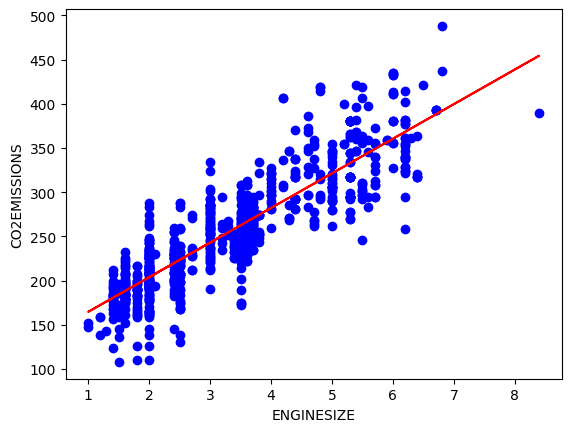

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')


In [20]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
actual = np.asanyarray(test[['CO2EMISSIONS']])
pred = regr.predict(test_x)

print('Mean Absolute Error= %.2f' %np.mean(np.absolute(pred- actual)))
print('Residual Sum of Square Error = %.2f' %np.mean((pred-actual) ** 2))
print('R square = %.2f' %r2_score(actual,pred))


Mean Absolute Error= 21.88
Residual Sum of Square Error = 846.00
R square = 0.79


In [23]:
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
regr.fit(train_x, train_y)
predictions = regr.predict(test_x)
print('Mean Absolute Error = %.2f' %np.mean(np.absolute(predictions - actual)))
print('Residual Sum of Square Error = %.2f' %np.mean((predictions-actual) ** 2))
print('R square = %.2f' %r2_score(actual,predictions))


Mean Absolute Error = 19.21
Residual Sum of Square Error = 750.23
R square = 0.81
